# Velocity Analysis

In this notebook I will examine stellar and gaseous radial velocities within the SMC Wing.

In [42]:
# Standard imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pylab import *
import scipy as scipy
from scipy import integrate
from scipy import stats
import itertools

In [43]:
# Original stellar radial velocity file

# The magnitudes described in "Feb26_matchinfo_vrad" contain the following corrections:
# vrad_nuv_v = nuv_v_init - 0.26
# vrad_nuv = nuv_init - 18.70 - 0.42

stellar_vrad_table = np.genfromtxt('Feb26_matchinfo_vrad', delimiter = ' ', dtype=None, encoding=None)

# Define variable lists
stellar_id_number = []
stellar_ra = []
stellar_dec = []
stellar_nuv_v = []
stellar_nuv = []
stellar_spectype = []
stellar_velocity = []

# Fill variable lists
# Addition of 0.6 is the correction between GALEX catalog vs. daophot
for i in range(len(stellar_vrad_table)):
    stellar_id_number.append(stellar_vrad_table[i][0])
    stellar_ra.append(stellar_vrad_table[i][1])
    stellar_dec.append(stellar_vrad_table[i][2])
    stellar_nuv_v.append(stellar_vrad_table[i][3] + 0.6)
    stellar_nuv.append(stellar_vrad_table[i][4] + 0.6)
    stellar_spectype.append(stellar_vrad_table[i][5])
    stellar_velocity.append(stellar_vrad_table[i][6])

# Convert all to numpy arrays
stellar_id_number, stellar_ra , stellar_dec = np.array(stellar_id_number), np.array(stellar_ra), np.array(stellar_dec)
stellar_nuv_v, stellar_nuv = np.array(stellar_nuv_v), np.array(stellar_nuv)
stellar_spectype, stellar_velocity = np.array(stellar_spectype), np.array(stellar_velocity)

In [44]:
# Original HI radial velocity file
HI_analysis = np.genfromtxt('Apr27_HI_rad_vel_analysis', delimiter=' ')

# Define variables
HI_velocity = HI_analysis[:,0]
HI_vel_kms = HI_velocity / 1000
HI_temperature = HI_analysis[:,1]

In [45]:
# HII radial velocity information
central = 166     # x [km/s]
error = 5     # +- x [km/s]

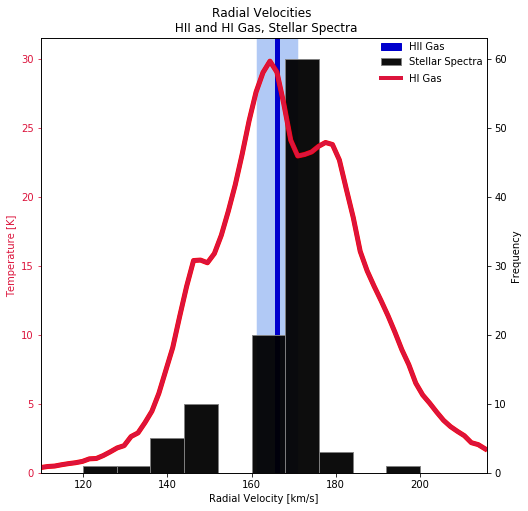

In [46]:
fig, ax1 = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
ax2 = ax1.twinx()

rect_central = patches.Rectangle((central-0.5,0), 1, 63, linewidth=1, facecolor='mediumblue', edgecolor='mediumblue', label='HII Gas')
rect_error = patches.Rectangle((central-5,0), error*2, 63, linewidth=1, facecolor='cornflowerblue', edgecolor='white', alpha=0.5)

# Add the patch to the Axes
ax1.add_patch(rect_error)
ax1.add_patch(rect_central)

color1 = 'black'
color2 = 'crimson'

ax1.hist(stellar_velocity, facecolor=color1, edgecolor='grey', label='Stellar Spectra', alpha=0.95)
ax1.set_title('Radial Velocities \n HII and HI Gas, Stellar Spectra')
ax1.set_xlabel('Radial Velocity [km/s]')
ax1.set_xlim(110, 216)
ax1.set_ylim(0, 63)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Frequency', color=color1)
ax1.tick_params('y', colors=color1)
ax1.legend(bbox_to_anchor=(0.998, 1), loc=1, borderaxespad=0., prop={'size':10}, frameon=False)

plt.plot(HI_vel_kms, HI_temperature, linewidth=5, color='r')
plt.plot(HI_vel_kms, HI_temperature, linewidth=4, color=color2, label="HI Gas")
ax2.set_ylabel('Temperature [K]', color=color2)
ax2.set_ylim(0, 31.5)
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_left()
ax2.tick_params('y', colors=color2)
ax2.legend(bbox_to_anchor=(0.907, 0.928), loc=1, borderaxespad=0., prop={'size':10}, frameon=False)

plt.show()

# Switch the axes on this so that Temperature is on the left and Frequency is on the right. (Switch ax1 and ax2)

In [47]:
# Compute HI mass

# Integrate over the HI gas temperature above
print("Integrate the above HI curve [K*km/s]:", 
      np.round(integrate.simps(HI_temperature, x=HI_vel_kms), 2), "\n")

# The average column density of HI in a beam simply scales with the integral of the temperature 
# over the velocity.
N_H = 1.8E18 * (integrate.simps(HI_temperature, x=HI_vel_kms))
print("Average column density of HI [atoms]:", '{:0.3e}'.format(N_H), "\n")

# The mass of an H atom is 1.67E-24 grams. If we account for Helium and other chemical elements 
# we multiply the H mass by 4/3 (an approximation but close enough). Thus the average mass per 
# atom including He and metals is about 2.2E-24 g/atom.
Sig_ISM = 2.2E-24 * N_H
print ("Average mass per atom [g/atom]:", '{:0.3e}'.format(Sig_ISM), "\n")

# At D=61 kpc 1 arcsec = .30 pc and 1 arcsec^2 = (.30)^2 = 9E-2 pc^2. Then our area of 2272500 
# arcsec^2 corresponds to 2.0E5 pc^2 or A_s = 1.9E41 cm^2.
M_ISM = 1.9E41 * Sig_ISM
print("Observed HI mass [grams]:", '{:0.3e}'.format(M_ISM), "\n")

# Convert to solar masses
HI_Msol = M_ISM / 1.989E33 
print("Observed HI mass [solar masses]:", '{:0.3e}'.format(HI_Msol), "\n")

# Ratio of HI mass to stellar mass
# Stellar mass taken from Isochrone Match.ipynb
HI_stellar_mass_ratio = '{:0.3e}'.format(HI_Msol / 18938.72)
print("Ratio of HI mass to stellar mass:", HI_stellar_mass_ratio)

Integrate the above HI curve [K*km/s]: 1231.35 

Average column density of HI [atoms]: 2.216e+21 

Average mass per atom [g/atom]: 4.876e-03 

Observed HI mass [grams]: 9.265e+38 

Observed HI mass [solar masses]: 4.658e+05 

Ratio of HI mass to stellar mass: 2.459e+01
